In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../data/crime_inegi_localidades.csv", parse_dates=True, 
                 index_col = ["nom_loc", "date"])
df.sort_index(level=['nom_loc','date'], inplace=True, ascending=[True, True])

In [41]:
dates_diff = {}
for i in df.index.levels[0]:
    dates_diff[i] = np.diff(df.loc[i,:].index.values.astype("datetime64[D]")).astype(int).tolist()

In [42]:
pd.Series([len(val) for x,val in dates_diff.items()]).value_counts()

0      20
1       6
3       3
6       3
2       2
4       2
836     1
5       1
8       1
202     1
13      1
46      1
83      1
27      1
30      1
160     1
99      1
102     1
106     1
109     1
17      1
dtype: int64

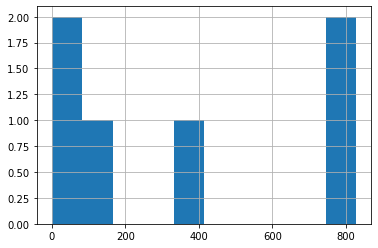

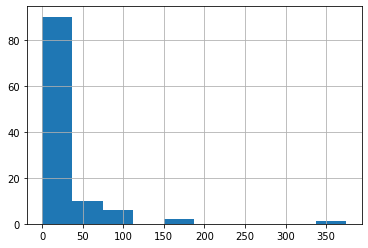

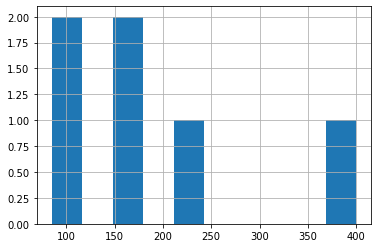

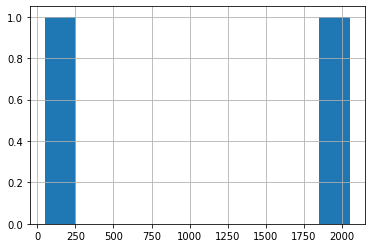

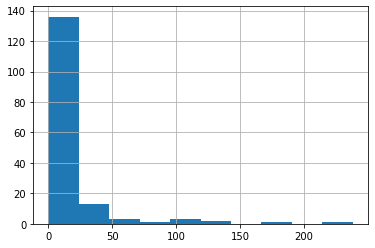

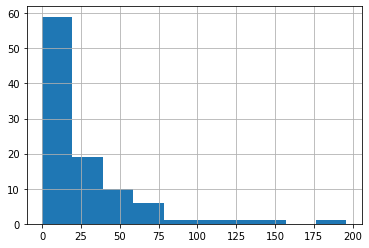

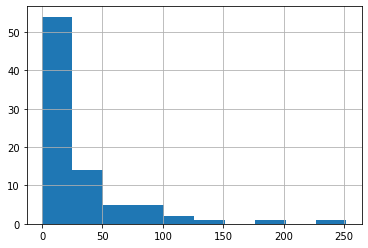

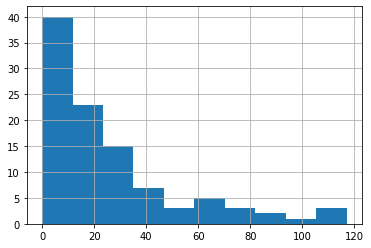

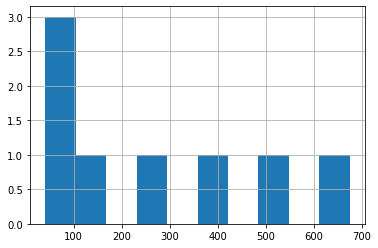

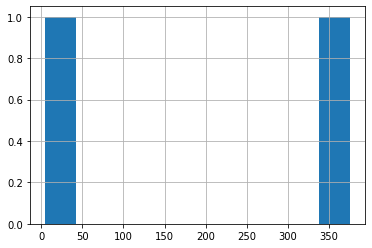

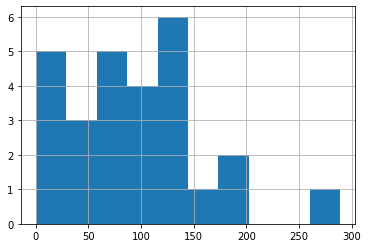

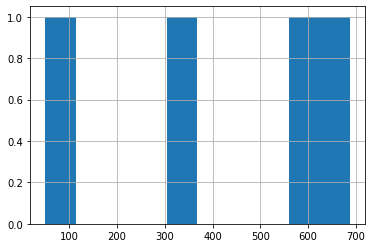

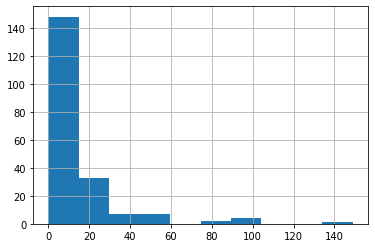

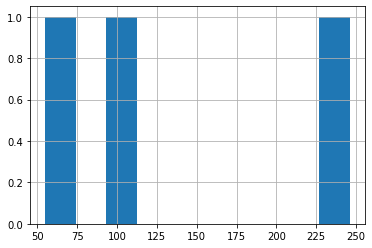

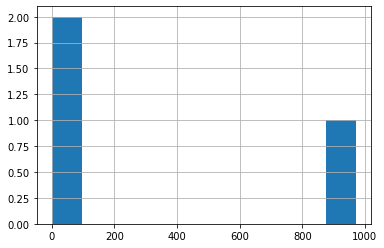

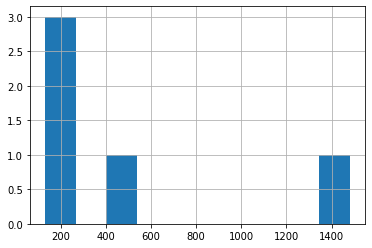

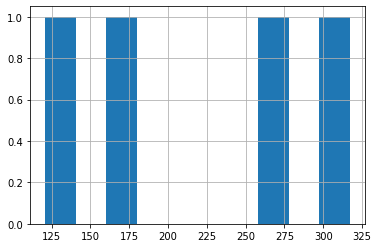

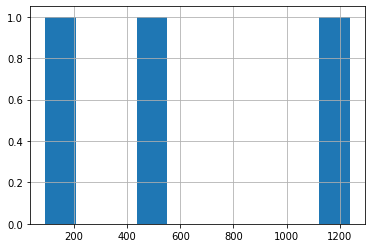

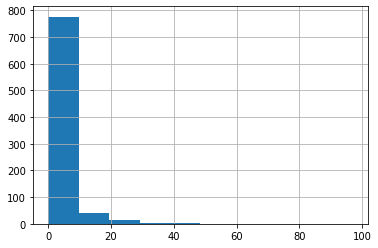

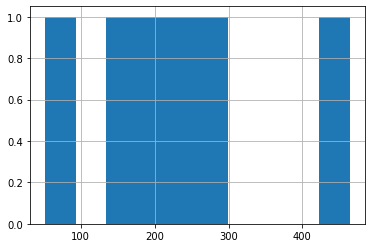

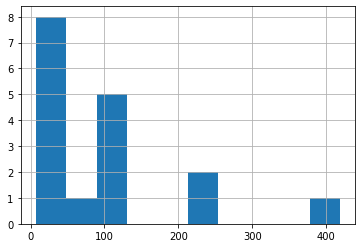

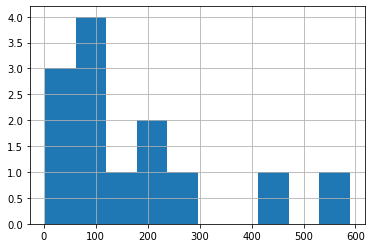

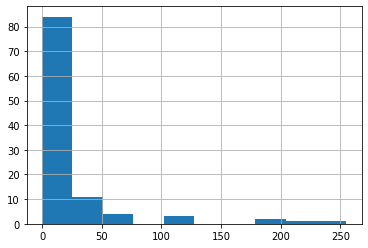

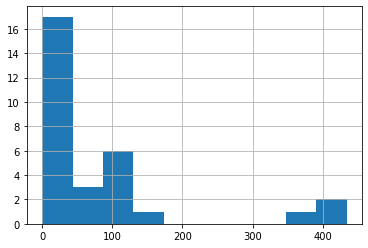

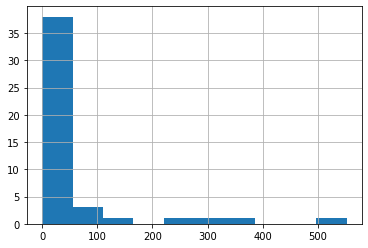

In [43]:
for key, val in dates_diff.items():
    if len(val) > 1:
        pd.Series(val).hist()
        plt.show()

In [31]:
import json

In [44]:
with open('../data/dates_diff.json', 'w') as fp:
    json.dump(dates_diff, fp)